<a href="https://colab.research.google.com/github/Sabrinawsf/analise-lojas/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [82]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [83]:
faturamento_total_loja1 = loja["Preço"].sum()
faturamento_total_loja2 = loja2["Preço"].sum()
faturamento_total_loja3 = loja3["Preço"].sum()
faturamento_total_loja4 = loja4["Preço"].sum()

In [84]:
faturamento_total = pd.DataFrame({
    "Loja": ["Loja1", "Loja2", "Loja3", "Loja4"],
    "Faturamento Total (R$)": [
        loja["Preço"].sum(),
        loja2["Preço"].sum(),
        loja3["Preço"].sum(),
        loja4["Preço"].sum()
    ]
})

faturamento_total_formatado = faturamento_total.copy()
faturamento_total_formatado["Faturamento Total (R$)"] = faturamento_total_formatado["Faturamento Total (R$)"].map(
    lambda x: f"R$ {x:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")
)

display(faturamento_total_formatado)

,Loja,Faturamento Total (R$)
0,Loja1,"R$ 1.534.509,12"
1,Loja2,"R$ 1.488.459,06"
2,Loja3,"R$ 1.464.025,03"
3,Loja4,"R$ 1.384.497,58"


# 2. Vendas por Categoria

In [85]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja1", "Loja2", "Loja3", "Loja4"]

for df, nome in zip(lojas, nomes_lojas):
    quantidade_categoria = (
        df.groupby("Categoria do Produto")["Produto"]
        .count()
        .reset_index()
        .rename(columns={"Produto": "Quantidade Vendida"})
        .sort_values(by="Quantidade Vendida", ascending=False)
    )
    print(nome)
    display(quantidade_categoria)



Loja1


,Categoria do Produto,Quantidade Vendida
6,moveis,465
2,eletronicos,448
0,brinquedos,324
1,eletrodomesticos,312
3,esporte e lazer,284
4,instrumentos musicais,182
5,livros,173
7,utilidades domesticas,171


Loja2


,Categoria do Produto,Quantidade Vendida
6,moveis,442
2,eletronicos,422
0,brinquedos,313
1,eletrodomesticos,305
3,esporte e lazer,275
4,instrumentos musicais,224
5,livros,197
7,utilidades domesticas,181


Loja3


,Categoria do Produto,Quantidade Vendida
6,moveis,499
2,eletronicos,451
0,brinquedos,315
1,eletrodomesticos,278
3,esporte e lazer,277
5,livros,185
4,instrumentos musicais,177
7,utilidades domesticas,177


Loja4


,Categoria do Produto,Quantidade Vendida
6,moveis,480
2,eletronicos,451
0,brinquedos,338
3,esporte e lazer,277
1,eletrodomesticos,254
7,utilidades domesticas,201
5,livros,187
4,instrumentos musicais,170


# 3. Média de Avaliação das Lojas


In [86]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

medias = [df["Avaliação da compra"].mean() for df in lojas]

media_avaliacoes = (
    pd.DataFrame({
        "Loja": nomes_lojas,
        "Média de Avaliação": medias
    })
    .sort_values(by="Média de Avaliação", ascending=False)
    .reset_index(drop=True)
)

media_avaliacoes["Média de Avaliação"] = media_avaliacoes["Média de Avaliação"].round(2)

display(media_avaliacoes)


,Loja,Média de Avaliação
0,Loja 3,4.05
1,Loja 2,4.04
2,Loja 4,4.00
3,Loja 1,3.98


In [87]:

lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja1", "Loja2", "Loja3", "Loja4"]
medias = []

for i, df in enumerate(lojas, start=1):
  medias.append(df["Avaliação da compra"].mean())

media_avaliacoes = pd.DataFrame({
      "Loja": nomes_lojas,
      "Média de Avaliação": medias})
display(media_avaliacoes)



,Loja,Média de Avaliação
0,Loja1,3.976685
1,Loja2,4.037304
2,Loja3,4.048326
3,Loja4,3.995759


# 4. Produtos Mais e Menos Vendidos

In [88]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

resultados = []

for df, nome in zip(lojas, nomes_lojas):

    vendas_produto = df["Produto"].value_counts()

    resultados.append({
        "Loja": nome,
        "Produto Mais Vendido": vendas_produto.idxmax(),
        "Qtd Mais Vendido": vendas_produto.max(),
        "Produto Menos Vendido": vendas_produto.idxmin(),
        "Qtd Menos Vendido": vendas_produto.min()
    })

tabela_vendas = pd.DataFrame(resultados)

# Exibição centralizada e estilizada
display(
    tabela_vendas.style
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([
        {'selector': 'th',
         'props': [('text-align', 'center'),
                   ('background-color', '#f2f2f2'),
                   ('font-weight', 'bold')]}
    ])
)



,Loja,Produto Mais Vendido,Qtd Mais Vendido,Produto Menos Vendido,Qtd Menos Vendido
0,Loja 1,Micro-ondas,60,Headset,33
1,Loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
2,Loja 3,Kit banquetas,57,Blocos de montar,35
3,Loja 4,Cama box,62,Guitarra,33


# 5. Frete Médio por Loja**

In [89]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]




In [90]:
frete_medio = pd.DataFrame({
    "Loja": nomes_lojas,
    "Frete Médio": [df["Frete"].mean() for df in lojas]
})

In [91]:
frete_medio = (
    frete_medio
    .assign(**{"Frete Médio": lambda x: x["Frete Médio"].round(2)})
    .sort_values(by="Frete Médio", ascending=False)
    .reset_index(drop=True)
)

display(frete_medio)

,Loja,Frete Médio
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


# 6. Gerando Grafico



---
**Faturamento total por Loja**

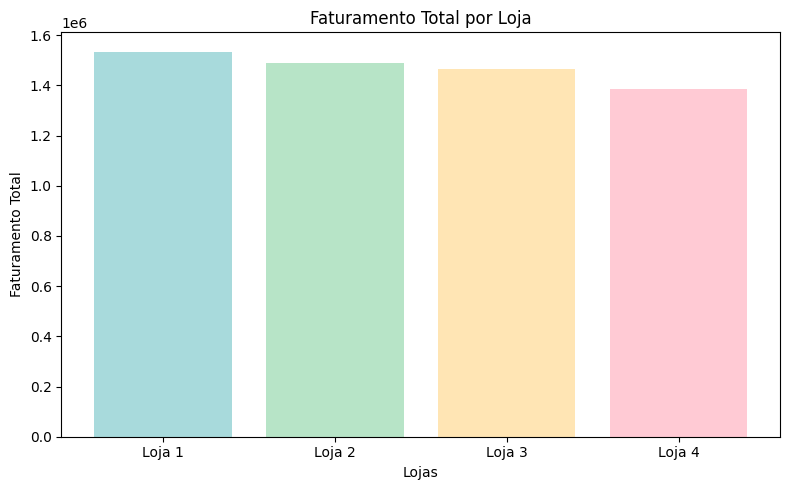

In [92]:
import matplotlib.pyplot as plt

lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

faturamentos = [df["Preço"].sum() for df in lojas]

cores_pasteis = ["#A8DADC", "#B7E4C7", "#FFE5B4", "#FFCAD4"]

plt.figure(figsize=(8,5))
plt.bar(nomes_lojas, faturamentos, color=cores_pasteis)

plt.title("Faturamento Total por Loja", fontsize=12, fontweight="medium")
plt.xlabel("Lojas")
plt.ylabel("Faturamento Total")
plt.xticks()
plt.tight_layout()
plt.show()



**Distribuição de Categorias (Loja 1 exemplo)**

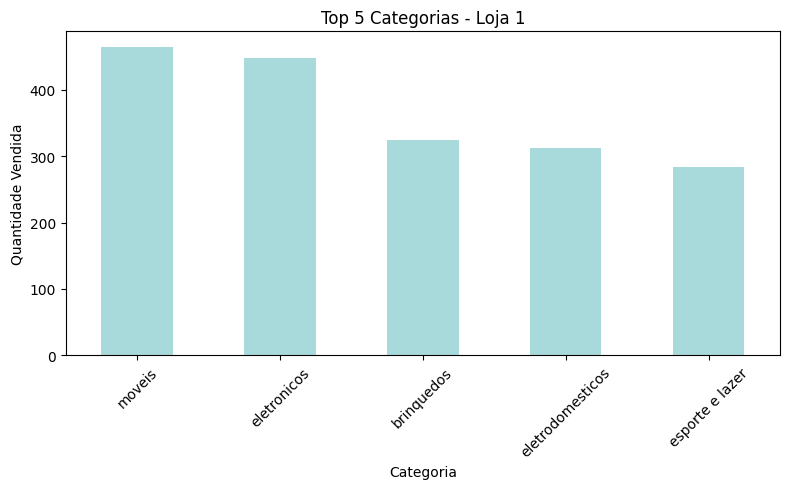

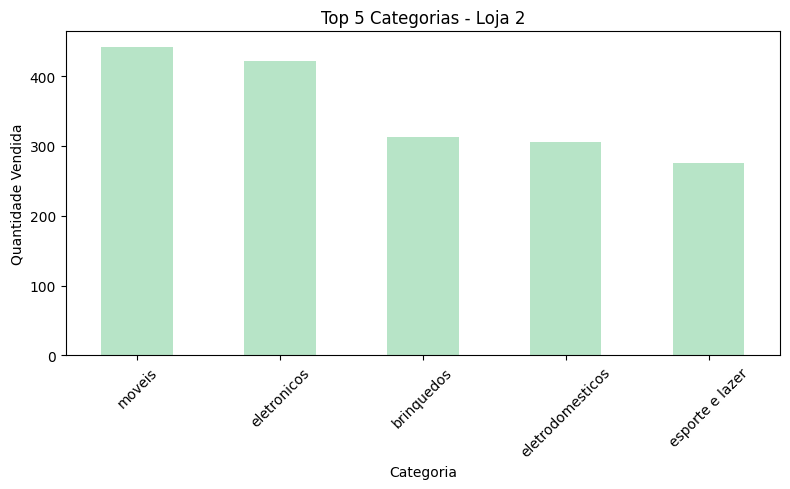

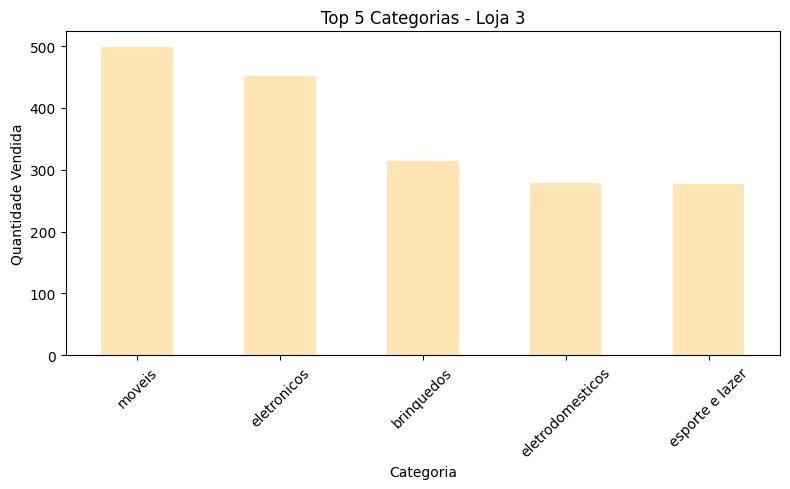

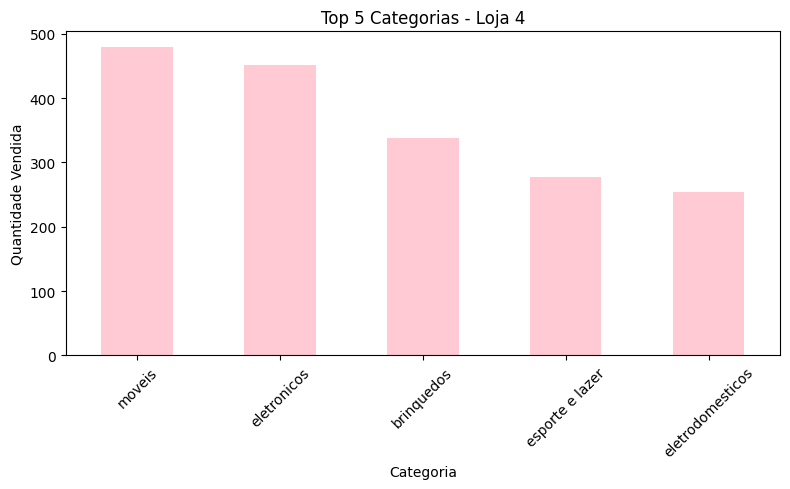

In [93]:
import matplotlib.pyplot as plt

lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
cores_pasteis = ["#A8DADC", "#B7E4C7", "#FFE5B4", "#FFCAD4"]

for df, nome, cor in zip(lojas, nomes_lojas, cores_pasteis):

    categoria = df["Categoria do Produto"].value_counts().head(5)

    plt.figure(figsize=(8,5))
    categoria.plot(kind="bar", color=cor)

    plt.title(f"Top 5 Categorias - {nome}", fontsize=12, fontweight="medium")
    plt.xlabel("Categoria")
    plt.ylabel("Quantidade Vendida")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()



**Avaliação Média por Loja**

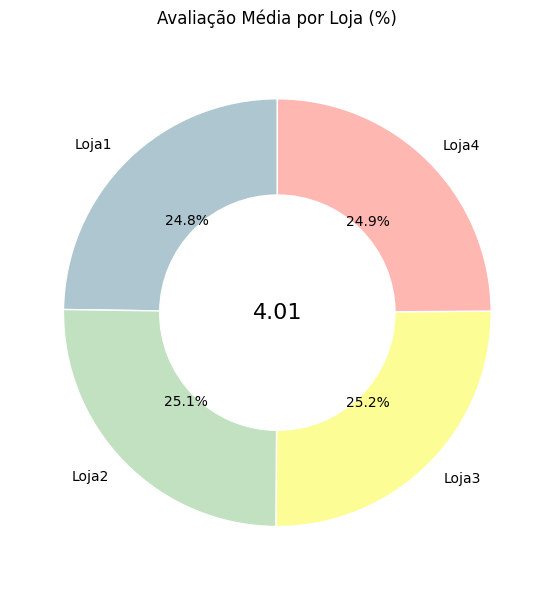

In [94]:
total = media_avaliacoes["Média de Avaliação"].sum()
media_avaliacoes["Percentual"] = (media_avaliacoes["Média de Avaliação"] / total) * 100

media_geral = media_avaliacoes["Média de Avaliação"].mean()

# Paleta pastel suave
cores_pasteis = ["#AEC6CF", "#C1E1C1", "#FDFD96", "#FFB7B2"]

fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(
    media_avaliacoes["Percentual"],
    labels=media_avaliacoes["Loja"],
    autopct="%.1f%%",
    startangle=90,
    colors=cores_pasteis,
    wedgeprops={"width": 0.45, "edgecolor": "white"}
)

# Texto mais leve
plt.setp(autotexts, size=10)
plt.setp(texts, size=10)

# Texto central minimalista
ax.text(
    0, 0,
    f"{media_geral:.2f}",
    ha='center',
    va='center',
    fontsize=16,
    fontweight='medium'
)

ax.set_title(
    "Avaliação Média por Loja (%)",
    fontsize=12,
    fontweight='medium',
    pad=15
)

plt.tight_layout()
plt.show()


**Frete Médio por Loja (Linha Pastel)**

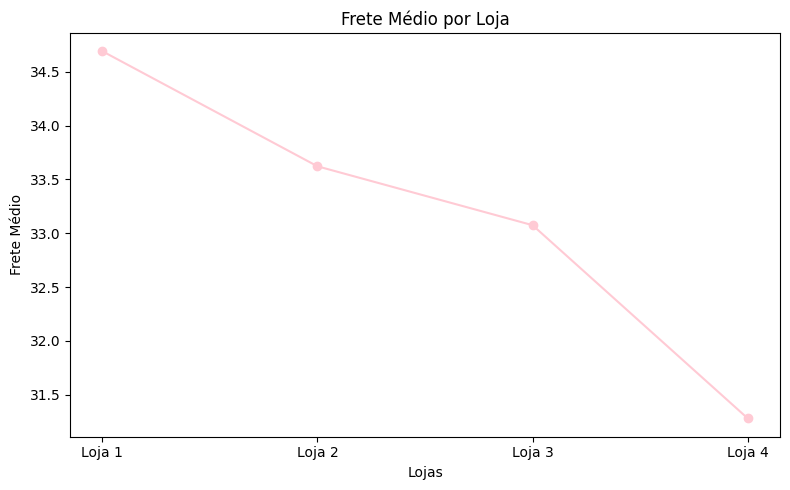

In [95]:
fretes_medios = [df["Frete"].mean() for df in lojas]

plt.figure(figsize=(8,5))
plt.plot(nomes_lojas, fretes_medios, marker='o', color="#FFCAD4")

plt.title("Frete Médio por Loja", fontsize=12, fontweight="medium")
plt.xlabel("Lojas")
plt.ylabel("Frete Médio")
plt.tight_layout()
plt.show()


# 7. Extra!  Análise de Desempenho Geográfico

**Distribuição Geografica de Vendas**

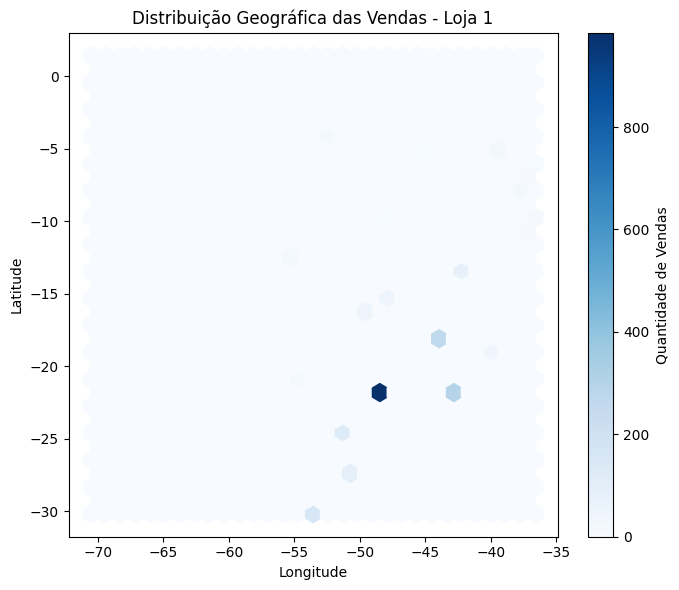

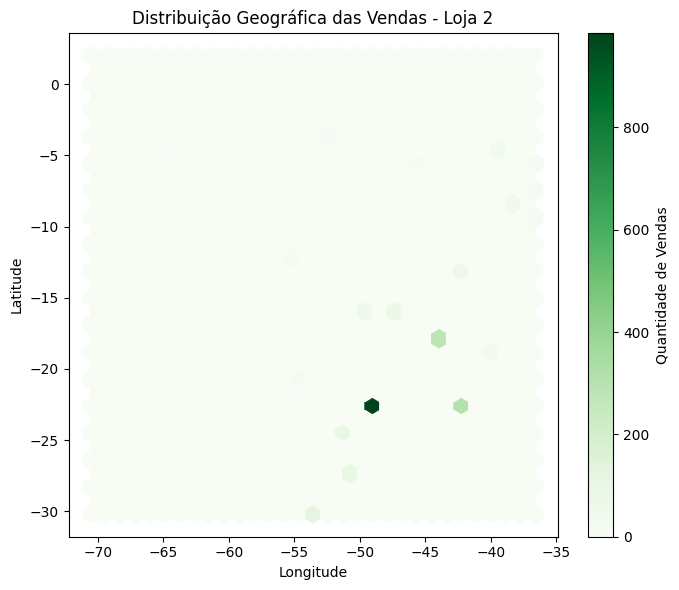

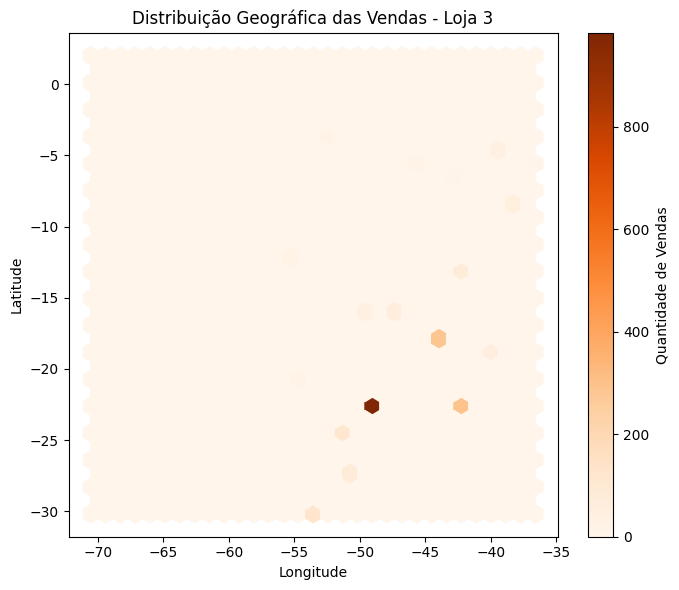

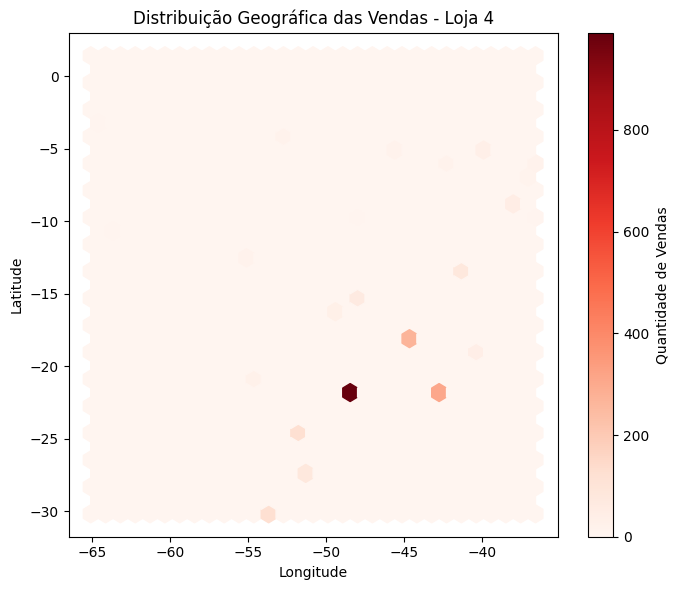

In [96]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
colormaps = ["Blues", "Greens", "Oranges", "Reds"]

for df, nome, cmap in zip(lojas, nomes_lojas, colormaps):

    plt.figure(figsize=(7,6))

    hb = plt.hexbin(
        df["lon"],
        df["lat"],
        gridsize=30,
        cmap=cmap
    )

    plt.colorbar(hb, label="Quantidade de Vendas")

    plt.title(f"Distribuição Geográfica das Vendas - {nome}", fontsize=12)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    plt.tight_layout()
    plt.show()



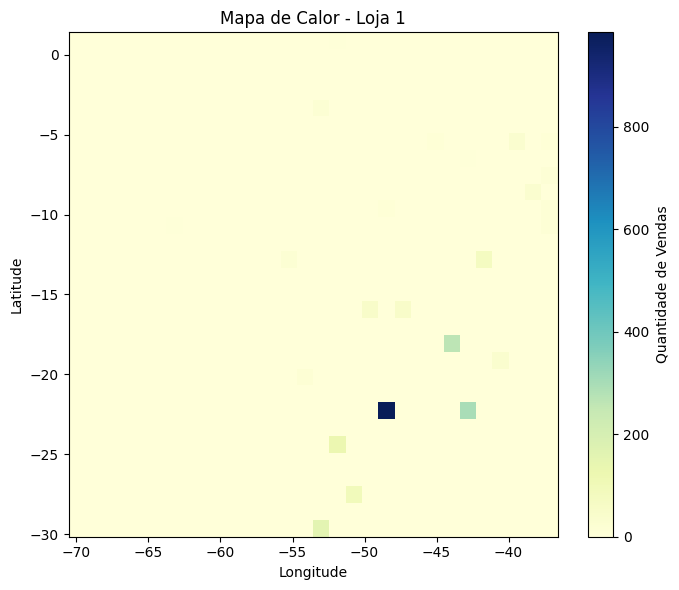

In [97]:
plt.figure(figsize=(7,6))

heatmap = plt.hist2d(
    loja["lon"],
    loja["lat"],
    bins=30,
    cmap="YlGnBu"
)

plt.colorbar(label="Quantidade de Vendas")

plt.title("Mapa de Calor - Loja 1", fontsize=12)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.show()



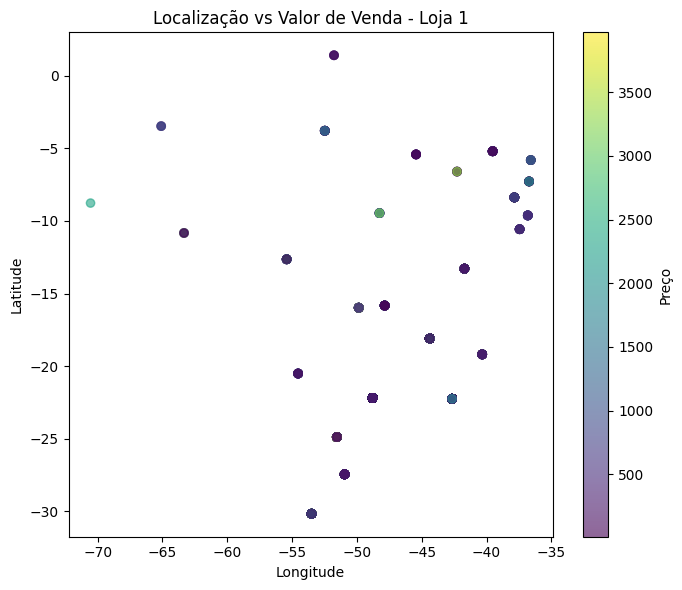

In [98]:
plt.figure(figsize=(7,6))

plt.scatter(
    loja["lon"],
    loja["lat"],
    c=loja["Preço"],
    cmap="viridis",
    alpha=0.6
)

plt.colorbar(label="Preço")

plt.title("Localização vs Valor de Venda - Loja 1", fontsize=12)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.show()
